In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
os.chdir(os.path.join('..', 'dynamic_programming'))
import import_ipynb
from grid_world import standard_grid, negative_grid, ACTION_SPACE
from iterative_policy_evaluation_deterministic import print_policy, print_values

importing Jupyter notebook from grid_world.ipynb
importing Jupyter notebook from iterative_policy_evaluation_deterministic.ipynb


In [2]:
ALPHA = 0.1
GAMMA = 0.9

In [3]:
def epsilon_greedy(greedy_policy, s, grid, eps = 0.1) :
    if np.random.random() < (1 - eps) :
        return greedy_policy[s]
    else :
        return np.random.choice(grid.actions[s])

Rewards
+---+---+---+----+
| 0 | 0 | 0 |  1 |
+---+---+---+----+
| 0 | 0 | 0 | -1 |
+---+---+---+----+
| 0 | 0 | 0 |  0 |
+---+---+---+----+
Policy
+---+---+---+---+
| R | R | R |   |
+---+---+---+---+
| U |   | D |   |
+---+---+---+---+
| U | L | L | R |
+---+---+---+---+
Values
+-------+-------+-------+--------+
| 0.798 | 0.885 | 0.971 |  0.000 |
+-------+-------+-------+--------+
| 0.702 | 0.000 | 0.010 |  0.000 |
+-------+-------+-------+--------+
| 0.607 | 0.538 | 0.422 | -0.021 |
+-------+-------+-------+--------+


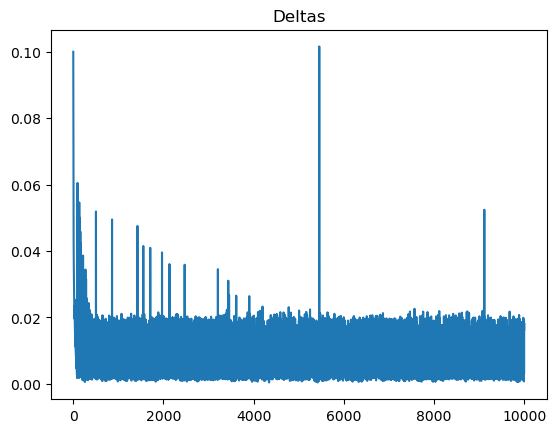

In [12]:
if __name__ == '__main__' :
    grid = standard_grid()
    
    #initialize V
    V = {}
    for s in grid.all_states() :
        V[s] = 0
    
    policy = {
        (0, 0): 'R',
        (0, 1): 'R',
        (0, 2): 'R',
        (1, 0): 'U',
        (1, 2): 'D',
        (2, 0): 'U',
        (2, 1): 'L',
        (2, 2): 'L',
        (2, 3): 'R'
    }
    
    state_sample_count = pd.DataFrame(np.zeros((3, 4)), dtype=np.int32)
    deltas = []
    
    print('Rewards')
    print_values(grid.rewards, grid)
    
    print('Policy')
    print_policy(policy, grid)
    
    for i in range(10000) :
        s = grid.reset()
        
        delta = 0
        while not grid.is_terminal(s) : 
            a = epsilon_greedy(policy, s, grid, eps = 0.1)
            r = grid.move(a)
            s_next = grid.current_state()
            state_sample_count.iloc[s] = state_sample_count.iloc[s] + 1
            V_old = V[s]
            V[s] = V[s] + ALPHA * (r + GAMMA * V[s_next] - V[s])
            delta = max(delta, np.abs(V_old - V[s]))
            s = s_next
            
        deltas.append(delta)
    
    print('Values')
    print_values(V, grid)
    
    plt.plot(deltas)
    plt.title('Deltas')

In [13]:
state_sample_count

,0,1,2,3
0,11108,11064,10496,0
1,11084,0,1,0
2,11140,637,45,73
